# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

 Observable Trends 
 * About the temperature is clear how there are more higher values in some the range (-20 to 20) Latitudes.
 * About the Cloudiness is regular for  all the Latitudes ranges.
 * Finally the correlations in Southern there are more negative than de Northern.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [4]:
#cities

In [5]:
#Doing a DataFrame
cities_pd=pd.DataFrame({"City":cities})

In [6]:
#check the dataFrame
cities_pd.head()

,City
0,george town
1,ushuaia
2,isiro
3,hilo
4,barrow


In [7]:
#More checking the dataFrame
cities_pd.shape

(598, 1)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Complete the structure of the dataFrame
cities_pd["Cloudiness"] =""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Humidity"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""
#Checking the Structure
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,george town,,,,,,,,
1,ushuaia,,,,,,,,
2,isiro,,,,,,,,
3,hilo,,,,,,,,
4,barrow,,,,,,,,


In [9]:
#The Api and params
params = {"appid":weather_api_key}
base_url = "http://api.openweathermap.org/data/2.5/weather?"

responses = []
params
for i, row in cities_pd.iterrows():
    params["q"] = {row['City']}
    response = requests.get(base_url, params=params).json()
    responses.append(response)
    

In [10]:
#Printing and assigning the results of responses
print("Beginning Data Retrieval")  
print("------------------------")         
for i,row in cities_pd.iterrows():  
    try:
        print(f"Processing Record {i} {responses[i]['id']} |{responses[i]['name']}")      
        cities_pd.loc[i,"Cloudiness"]=responses[i]["clouds"]["all"]
        cities_pd.loc[i,"Country"]=responses[i]["sys"]["country"]
        cities_pd.loc[i,"Date"]=responses[i]["dt"]
        cities_pd.loc[i,"Humidity"] = responses[i]["main"]["humidity"]
        cities_pd.loc[i,"Lat"] = responses[i]["coord"]["lat"]
        cities_pd.loc[i,"Lng"]= responses[i]["coord"]["lon"]
        cities_pd.loc[i,"Max Temp"] = responses[i]["main"]["temp_max"]
        cities_pd.loc[i,"Wind Speed"] = responses[i]["wind"]["speed"]
                
    except:
        print(f"City not found {row['City']}. Skipping ....")



Beginning Data Retrieval
------------------------
Processing Record 0 1735106 |George Town
Processing Record 1 3833367 |Ushuaia
Processing Record 2 215771 |Isiro
Processing Record 3 5855927 |Hilo
Processing Record 4 5880054 |Barrow
Processing Record 5 6089245 |Norman Wells
City not found palabuhanratu. Skipping ....
Processing Record 7 5983720 |Iqaluit
Processing Record 8 3874787 |Punta Arenas
Processing Record 9 6165406 |Thompson
Processing Record 10 2381334 |Atar
Processing Record 11 3579925 |St. George's
Processing Record 12 6111867 |Port Hawkesbury
Processing Record 13 3687451 |Caracolí
Processing Record 14 3369157 |Cape Town
Processing Record 15 4726521 |San Patricio
Processing Record 16 4032243 |Vaini
Processing Record 17 3372707 |Ribeira Grande
Processing Record 18 5122534 |Jamestown
Processing Record 19 3374210 |São Filipe
Processing Record 20 55671 |Kismayo
Processing Record 21 4513583 |Hamilton
Processing Record 22 2986732 |Ploemeur
Processing Record 23 2028164 |Deputatsky
Ci

Processing Record 225 1525988 |Ayagoz
City not found tasbuget. Skipping ....
Processing Record 227 778707 |Mehamn
Processing Record 228 2629833 |Husavik
Processing Record 229 3655131 |La Libertad
Processing Record 230 1732826 |Mersing
Processing Record 231 2037078 |Hailar
Processing Record 232 964432 |Port Alfred
Processing Record 233 2441447 |Maïné Soroa
Processing Record 234 543508 |Kovdor
Processing Record 235 2641434 |Northam
Processing Record 236 211647 |Lodja
City not found samalaeulu. Skipping ....
Processing Record 238 2450173 |Taoudenni
Processing Record 239 5563839 |Fortuna
Processing Record 240 1489401 |Toora-Khem
Processing Record 241 6179652 |Weyburn
Processing Record 242 2082539 |Merauke
City not found artyk. Skipping ....
Processing Record 244 6148373 |Sioux Lookout
Processing Record 245 556268 |Ostrovnoy
City not found phan rang. Skipping ....
City not found attawapiskat. Skipping ....
Processing Record 248 2911296 |Altona
Processing Record 249 7671223 |Kloulklubed
Proc

Processing Record 439 686090 |Asău
City not found toliary. Skipping ....
Processing Record 441 2017979 |Petropavlovka
Processing Record 442 1853483 |Oyama
Processing Record 443 2396646 |Oyem
Processing Record 444 5134295 |Rome
Processing Record 445 6316343 |Alta Floresta
Processing Record 446 64814 |Bandarbeyla
Processing Record 447 3398931 |Gilbués
Processing Record 448 921786 |Mitsamiouli
Processing Record 449 1649150 |Bengkulu
Processing Record 450 125897 |Langarūd
Processing Record 451 2374583 |Bubaque
Processing Record 452 3129135 |Avilés
City not found umzimvubu. Skipping ....
Processing Record 454 2427637 |Mongo
Processing Record 455 3141548 |Rognan
City not found crab hill. Skipping ....
Processing Record 457 2058430 |Whyalla
Processing Record 458 3108308 |Tarazona
Processing Record 459 2630299 |Hofn
Processing Record 460 5072006 |Lincoln
Processing Record 461 3869716 |Tocopilla
Processing Record 462 3176959 |Florence
City not found warqla. Skipping ....
Processing Record 464 2

In [11]:
#Checking the results over the dataFrame
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,george town,20,MY,1603852380,83,5.41,100.34,302.15,2.6
1,ushuaia,40,AR,1603852381,42,-54.8,-68.3,280.15,6.2
2,isiro,100,CD,1603852147,98,2.77,27.62,292.37,0.57
3,hilo,75,US,1603852149,74,19.73,-155.09,300.15,1.5
4,barrow,75,US,1603852296,68,71.29,-156.79,272.15,10.3


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Export a csv File all the data 
cities_pd.to_csv('./Resources/cities.csv')
cities_pd.to_csv('../VacationPy/Resources/cities.csv')

In [13]:
#Format field Date
cities_pd.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

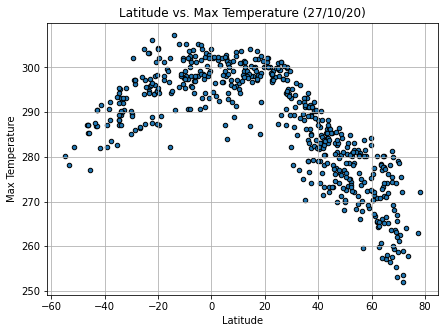

In [14]:
#Plot using Date as Title create a series of scatter plots to showcase the following relationships:
#Date current Date ?? (including date of analysis)    Save the plotted figures as .pngs.
DateChart=datetime.datetime.today().strftime('%d/%m/%y')
#DateChart
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Max Temp"] = pd.to_numeric(cities_pd["Max Temp"])
LatvsTemp=cities_pd.plot(kind="scatter", x="Lat",y="Max Temp",edgecolor="Black" ,figsize=(7,5))
LatvsTemp.set_title(f"Latitude vs. Max Temperature ({DateChart})")
LatvsTemp.set_xlabel("Latitude")
LatvsTemp.set_ylabel("Max Temperature")
LatvsTemp.grid()
LatvsTemp.figure.savefig("./Images/LatitudevsTemperature.png")
plt.show()

* The Max Temperature is where Latitude is between 0 to 20.

#### Latitude vs. Humidity Plot

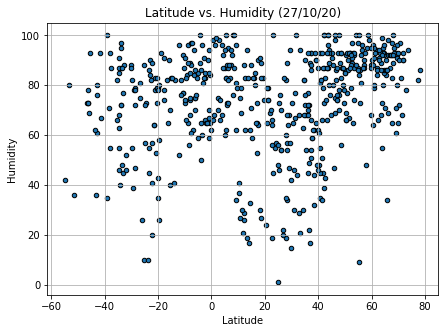

In [15]:
#Date current Date ?? (including date of analysis)   
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Humidity"] = pd.to_numeric(cities_pd["Humidity"])
LatvsHum=cities_pd.plot(kind="scatter", x="Lat",y="Humidity",edgecolor="Black" ,figsize=(7,5))
LatvsHum.set_title(f"Latitude vs. Humidity ({DateChart})")
LatvsHum.set_xlabel("Latitude")
LatvsHum.set_ylabel("Humidity")
LatvsHum.grid()
LatvsHum.figure.savefig("./Images/LatitudevsHumidity.png")
plt.show()

* There are more Humidity in the highest Latitudes

#### Latitude vs. Cloudiness Plot

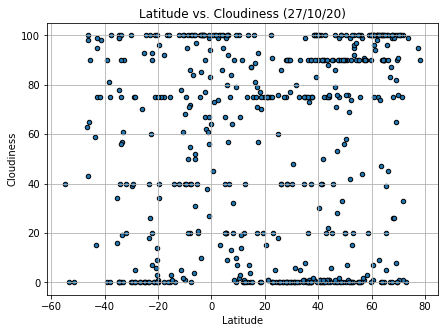

In [16]:
#Date current Date  (including date of analysis)
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Cloudiness"] = pd.to_numeric(cities_pd["Cloudiness"])
LatvsCloud=cities_pd.plot(kind="scatter", x="Lat",y="Cloudiness",edgecolor="Black" ,figsize=(7,5))
LatvsCloud.set_title(f"Latitude vs. Cloudiness ({DateChart})")
LatvsCloud.set_xlabel("Latitude")
LatvsCloud.set_ylabel("Cloudiness")
LatvsCloud.grid()
LatvsCloud.figure.savefig("./Images/LatitudevsCloudiness.png")
plt.show()

* The are more Cloudiness look more in the highest and lowest values of Latitude.

#### Latitude vs. Wind Speed Plot

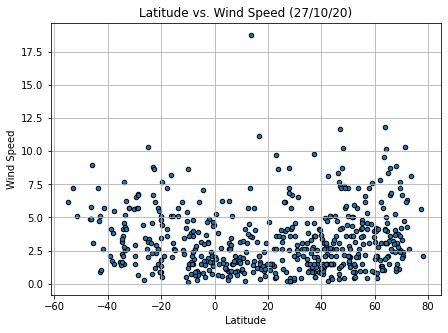

In [17]:
#Date current Date ?? (including date of analysis)
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Wind Speed"] = pd.to_numeric(cities_pd["Wind Speed"])
LatvsWind=cities_pd.plot(kind="scatter", x="Lat",y="Wind Speed",edgecolor="Black" ,figsize=(7,5))
LatvsWind.set_title(f"Latitude vs. Wind Speed ({DateChart})")
LatvsWind.set_xlabel("Latitude")
LatvsWind.set_ylabel("Wind Speed")
LatvsWind.grid()
LatvsWind.figure.savefig("./Images/LatitudevsWindSpeed.png")
plt.show()

* The wind spreed cover all the Latitude ranges

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots *checck   r value

# Function for creating linear agression and scatter plot parameters values a evaluate
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) =stats.linregress(x_values,y_values)
    regress_values =x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    #print(line_eq)
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,'r')
    print(f" The r squared value is : {rvalue**2}")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')
    

In [19]:
# Create Northern and Southern Hemisphere DataFrames  ***check lat > 0  y long   Northern >0  Southern <0
#North
NorthernHemisphere=cities_pd.loc[cities_pd["Lat"] >= 0]
#South
SouthernHemisphere=cities_pd.loc[cities_pd["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r squared value is : 0.7647497704630112


Text(0, 0.5, 'Max Temp')

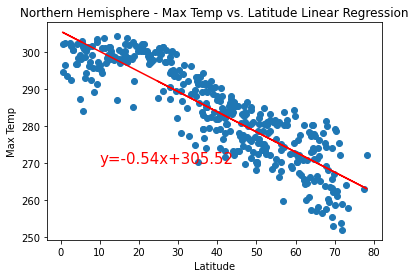

In [20]:
# Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Max Temp"])
# function to show line_eq
annotate(function,10,270)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp")


* It shows a nice positive correlation Max Temp vs the Latitude in the Northern Hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r squared value is : 0.49573395026524675


Text(0, 0.5, 'Max Temp')

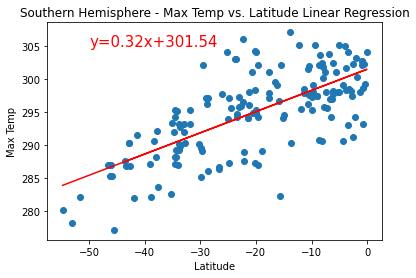

In [21]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Max Temp"])
# function to show line_eq
annotate(function,-50,305)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp")

* It is a negative correlation Latitude vs Max Temperature in the Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r squared value is : 0.09069301162910902


Text(0, 0.5, 'Humidity')

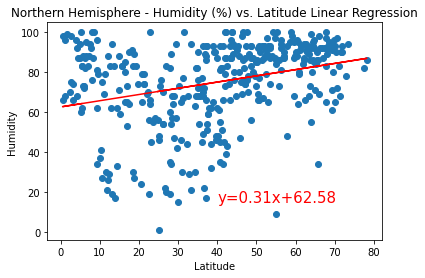

In [22]:
#Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Humidity"])
# function to show line_eq
annotate(function,40,15)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity")

* There a positive correlation Humidity vs Latitudes for Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r squared value is : 0.03809265563745527


Text(0, 0.5, 'Humidity')

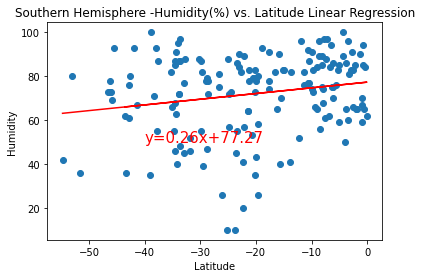

In [23]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Humidity"])
# function to show line_eq
annotate(function,-40,50)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere -Humidity(%) vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity")

* There are negative correlation Latitude vs Humidity in Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r squared value is : 0.01820467390458671


Text(0, 0.5, 'Cloudiness')

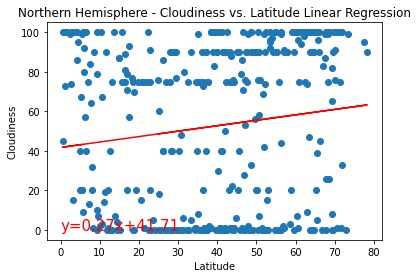

In [24]:
# Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Cloudiness"])
# function to show line_eq
annotate(function,0,0)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness")

* Looks that there positive correlation Cloudiness vs Latitude in Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r squared value is : 0.018862060942503346


Text(0, 0.5, 'Cloudiness')

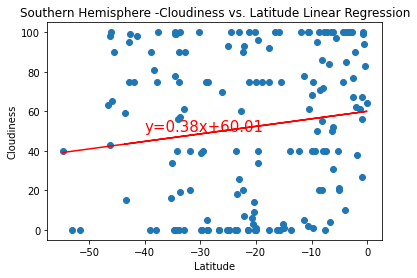

In [25]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Cloudiness"])
# function to show line_eq
annotate(function,-40,50)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere -Cloudiness vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness")

* It looks a soft correlation of Cloudiness vs Latitude in Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r squared value is : 0.0474688927454684


Text(0, 0.5, 'Wind Speed')

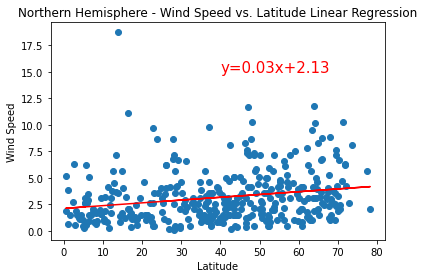

In [26]:
#Using function linear regression
function= linear_regression(NorthernHemisphere["Lat"],NorthernHemisphere["Wind Speed"])
# function to show line_eq
annotate(function,40,15)
# Label plot title and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed")

* It clear a nice positive correlation between Wind Speed vs Latitude in the  Northern 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r squared value is : 0.08355356432601521


Text(0, 0.5, 'Wind Speed')

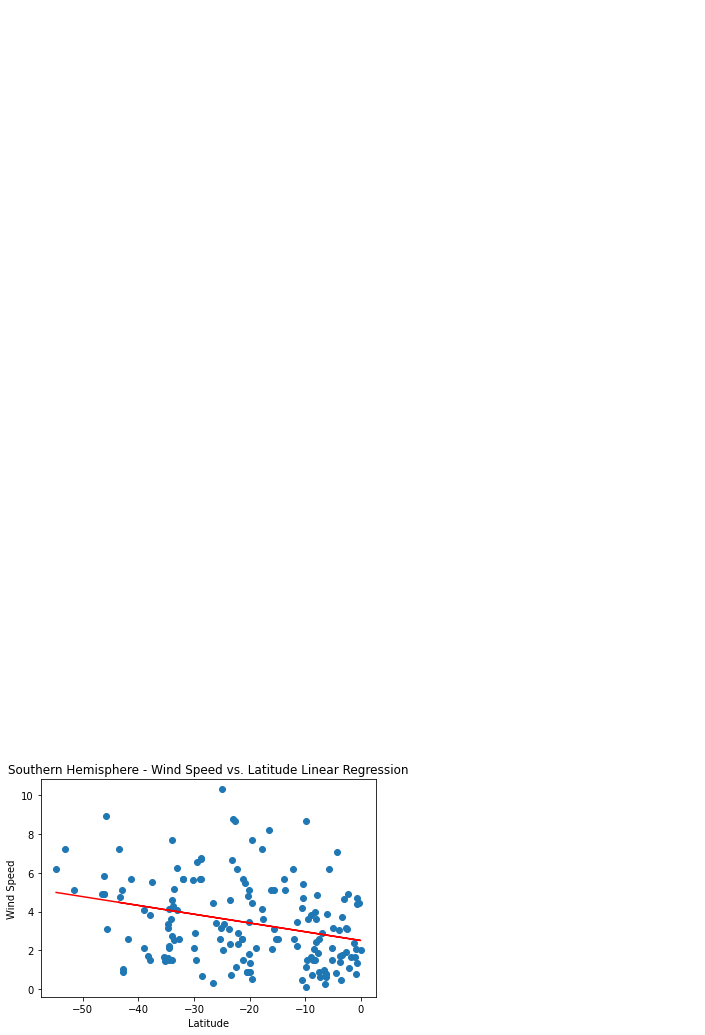

In [27]:
# Using function linear regression
function= linear_regression(SouthernHemisphere["Lat"],SouthernHemisphere["Wind Speed"])
# function to show line_eq
annotate(function,40,50)
# Label plot title and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
#plt.annotate(line_eq,(0,0),fontsize=15,color="Red")
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed")

* There are some negative correlation of Wind Speed and Latitude in the Southern Hemisphere

***************************************************************************************************